In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import numpy as np
import pickle as pkl
import pandas as pd
import os
from scipy.stats import binom_test
import seaborn as sns
import itertools as it
import fnmatch

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]
def findClosestPoint(values,array):
    values = np.array(values)
    array = np.array(array)
    idx = np.array([np.square(array - value).argmin() for value in values])
    return idx,array[idx]

In [4]:
dbList = [os.path.join(item[0],item[1]) for item in locate('aw*.db','./dataFiles/')]
roDB = pd.DataFrame([],columns=['ti','tf','tp','tSub','lSub','rSub','Lcorr','Rcorr','Lpv','Rpv','animal_ID'])
for db in dbList:
    roDB = roDB.append(pd.read_pickle(db),ignore_index=True)
df = roDB.copy()

In [5]:
corrBins = np.arange(-1.05,1.15,0.05)
corrBinsCenters = (corrBins+0.025)[:-1]
##########################################
surrProbs = []
for n in range(4,11):
    crr = pkl.load(open('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/RankOrder/corr'+str(n)+'.crr','rb'))
    hst = np.histogram(crr,corrBins,normed=True)[0]
    surrProbs.append(hst)
#################################
for n in range(4,11):
    print n
    print '----------------'
    dfLsub = df[df.lSub==n]
    dfRsub = df[df.rSub==n]
    hstL = np.histogram(dfLsub.Lcorr,corrBins)[0]
    hstR = np.histogram(dfRsub.Rcorr,corrBins)[0]
    for item in np.where(hstL)[0]:
        #print hstL[item],corrBinsCenters[item]
        p_value = binom_test(hstL[item],hstL.sum(),surrProbs[n-4][item]*0.05)
        if p_value < 0.05:
            idxs = np.where(np.abs(findClosestPoint(dfLsub.Lcorr,corrBinsCenters)[1]- corrBinsCenters[item])<0.01)[0]
            locs = dfLsub.index[idxs]
            df.Lpv[locs] += (p_value-1)
            #print p_value,dfLsub.Lcorr.loc[locs]
    #print '####################'
    for item in np.where(hstR)[0]:
        #print hstR[item],corrBinsCenters[item]
        p_value = binom_test(hstR[item],hstR.sum(),surrProbs[n-4][item]*0.05)
        if p_value < 0.05:
            idxs = np.where(np.abs(findClosestPoint(dfRsub.Rcorr,corrBinsCenters)[1]- corrBinsCenters[item])<0.01)[0]
            locs = dfRsub.index[idxs]
            df.Rpv[locs] += (p_value-1)
            #print p_value

    print '##############################################################################'
###################################################################################
print '10++'
dfLsub = df[df.lSub>10]
dfRsub = df[df.rSub>10]
hstL = np.histogram(dfLsub.Lcorr,corrBins)[0]
hstR = np.histogram(dfRsub.Rcorr,corrBins)[0]
for item in np.where(hstL)[0]:
    #print hstL[item],corrBinsCenters[item]
    p_value = binom_test(hstL[item],hstL.sum(),surrProbs[-1][item]*0.05)
    if p_value < 0.05:
        #print corrBinsCenters[item],p_value
        idxs = np.where(np.abs(findClosestPoint(dfLsub.Lcorr,corrBinsCenters)[1]- corrBinsCenters[item])<0.01)[0]
        locs = dfLsub.index[idxs]
        df.Lpv[locs] += (p_value-1)
print '####################'
for item in np.where(hstR)[0]:
    #print hstR[item],corrBinsCenters[item]
    p_value = binom_test(hstR[item],hstR.sum(),surrProbs[-1][item]*0.05)
    if p_value < 0.05:
        idxs = np.where(np.abs(findClosestPoint(dfRsub.Rcorr,corrBinsCenters)[1]- corrBinsCenters[item])<0.01)[0]
        locs = dfRsub.index[idxs]
        df.Rpv[locs] += (p_value-1)


4
----------------
##############################################################################
5
----------------
##############################################################################
6
----------------
##############################################################################
7
----------------
##############################################################################
8
----------------
##############################################################################
9
----------------
##############################################################################
10
----------------
##############################################################################
10++
####################


4 40 11
2.91564838356e-06
5 17 0
1.0
6 4 0
1.0
7 7 0
1.0
8 1 1
0.05
9 0 0
1.0
10 0 0
1.0
11 0 0
1.0
12 0 0
1.0
13 0 0
1.0
14 0 0
1.0
15 0 0
1.0
16 0 0
1.0
17 0 0
1.0
18 0 0
1.0
19 0 0
1.0
------------------------
########################
4 55 0
0.115543694531
5 17 4
0.00880060494769
6 8 2
0.0572446502734
7 0 0
1.0
8 1 1
0.05
9 0 0
1.0
10 1 1
0.05
11 0 0
1.0
12 0 0
1.0
13 0 0
1.0
14 0 0
1.0
15 0 0
1.0
16 0 0
1.0
17 0 0
1.0
18 0 0
1.0
19 0 0
1.0
------------------------
151 20 7.09410668979e-05


/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


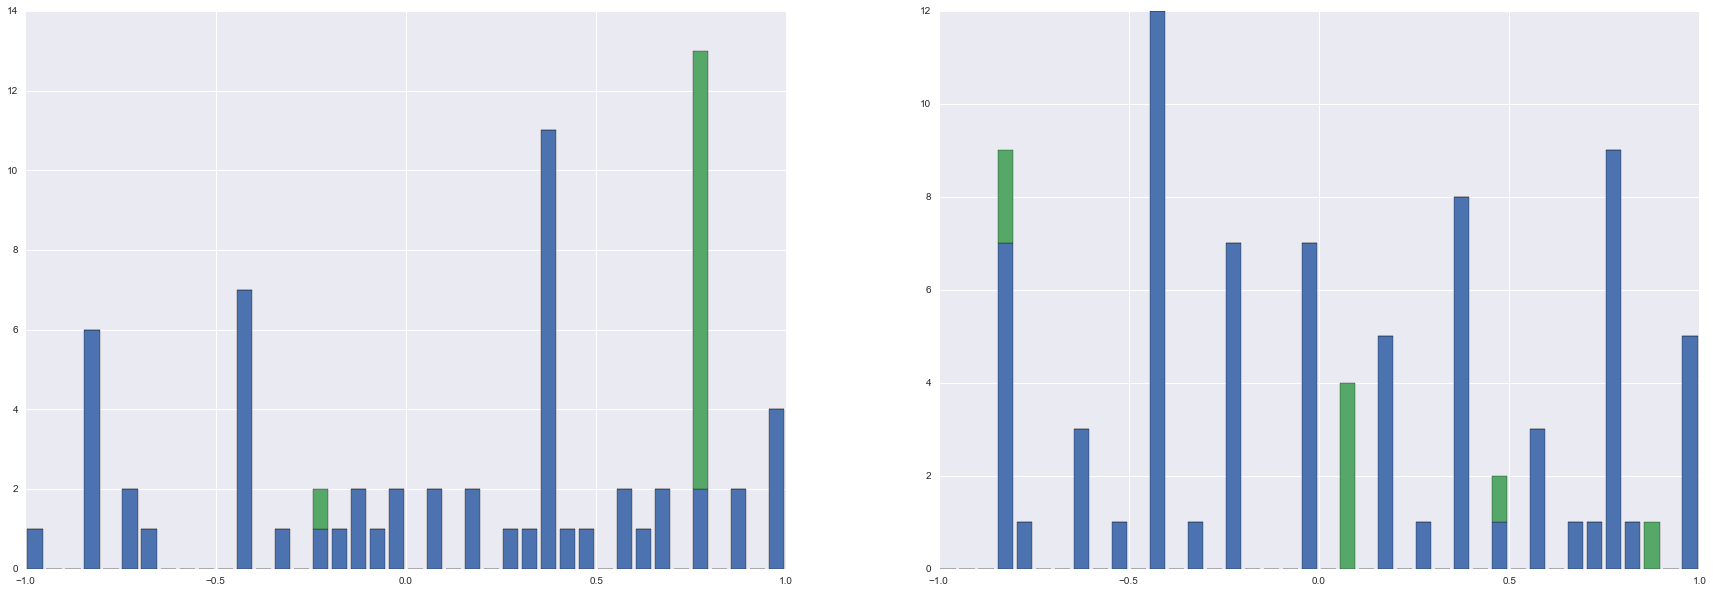

In [6]:
fig,(ax,bx) = pl.subplots(1,2,figsize=[30,10],sharex=True)
ax.hist([df[df.Lpv==1].Lcorr,df[df.Lpv!=1].Lcorr],corrBins,label=[],normed=False,stacked=True);
bx.hist([df[df.Rpv==1].Rcorr,df[df.Rpv!=1].Rcorr],corrBins,label=[],normed=False,stacked=True);
ax.set_xlim(-1,1)
pl.legend()
#############################
nT = 0
nS = 0
for n in range(4,20):
    dbN = df[df.lSub==n]
    if 1:#dbN[dbN.Lpv<1].shape[0]:
        nT+=dbN.shape[0]
        nS+=dbN[dbN.Lpv<0.05].shape[0]
        print n,dbN.shape[0],dbN[dbN.Lpv<0.5].shape[0]
        print binom_test(dbN[dbN.Lpv<0.5].shape[0],dbN.shape[0],5e-2)
print '------------------------'
print '########################'
for n in range(4,20):
    dbN = df[df.rSub==n]
    if 1:#dbN[dbN.Rpv<1].shape[0]:
        nT+=dbN.shape[0]
        nS+=dbN[dbN.Rpv<0.05].shape[0]
        print n,dbN.shape[0],dbN[dbN.Rpv<0.5].shape[0]
        print binom_test(dbN[dbN.Rpv<0.5].shape[0],dbN.shape[0],5e-2)
print '------------------------'
print nT,nS,binom_test(nS,nT,0.05)

In [7]:
binwidth = 0.1
A = np.linspace(0,1.,1.0/binwidth+1)
binwidth = np.diff(A)[0]
corrBinsCenters = np.union1d(-1*A,A)
corrBins = corrBinsCenters-binwidth/2
corrBins = np.insert(corrBins,[corrBins.size],[corrBins[-1]+binwidth])
##########################################
surrProbs = []
for n in range(4,11):
    crr = pkl.load(open('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/RankOrder/corr'+str(n)+'.crr','rb'))
    hst = np.histogram(crr,corrBins,normed=True)[0]
    surrProbs.append(hst)
#################################
idx = [findClosestPoint([0.025],binwidth*np.cumsum(surrProbs[n-5]))[0] for n in range(5,11)]
SigCorrMin = [np.abs(corrBinsCenters[ii+1][0]) for ii in idx]
for idx,row in roDB.iterrows():
    if row.lSub>4:
        if np.abs(row.Lcorr) > SigCorrMin[min(int(row.lSub - 5),len(SigCorrMin)-1)]:
            row.Lpv-=0.96
    if row.rSub>4:
        if np.abs(row.Rcorr) > SigCorrMin[min(int(row.rSub - 5),len(SigCorrMin)-1)]:
            row.Rpv-=0.96
            
nT = 0
nS = 0
for n in range(5,20):
    dbN = roDB[roDB.lSub==n]
    if 1:#dbN[dbN.Lpv<1].shape[0]:
        nT+=dbN.shape[0]
        nS+=dbN[dbN.Lpv<0.05].shape[0]
        print n,dbN.shape[0],dbN[dbN.Lpv<0.5].shape[0]
        print binom_test(dbN[dbN.Lpv<0.5].shape[0],dbN.shape[0],5e-2)
print '------------------------'
print '########################'
for n in range(5,20):
    dbN = roDB[roDB.rSub==n]
    if 1:#dbN[dbN.Rpv<1].shape[0]:
        nT+=dbN.shape[0]
        nS+=dbN[dbN.Rpv<0.05].shape[0]
        print n,dbN.shape[0],dbN[dbN.Rpv<0.5].shape[0]
        print binom_test(dbN[dbN.Rpv<0.5].shape[0],dbN.shape[0],5e-2)
print '------------------------'
print nT,nS,binom_test(nS,nT,0.05)

5 17 0
1.0
6 4 0
1.0
7 7 0
1.0
8 1 0
1.0
9 0 0
1.0
10 0 0
1.0
11 0 0
1.0
12 0 0
1.0
13 0 0
1.0
14 0 0
1.0
15 0 0
1.0
16 0 0
1.0
17 0 0
1.0
18 0 0
1.0
19 0 0
1.0
------------------------
########################
5 17 0
1.0
6 8 3
0.00578821792969
7 0 0
1.0
8 1 1
0.05
9 0 0
1.0
10 1 0
1.0
11 0 0
1.0
12 0 0
1.0
13 0 0
1.0
14 0 0
1.0
15 0 0
1.0
16 0 0
1.0
17 0 0
1.0
18 0 0
1.0
19 0 0
1.0
------------------------
56 4 0.363415747933


In [9]:
df[(df.Lpv<0.05)&(df.Rpv<0.05)].shape

(0, 11)

In [11]:
roDB[(roDB.Lpv<0.05)&(roDB.Rpv<0.05)].shape

(0, 11)

In [12]:
print roDB[(roDB.lSub-roDB.rSub==0)&(df.rSub>4)].shape

print df[(df.lSub-df.rSub==0)&(df.rSub>3)].shape

(5, 11)
(18, 11)


In [13]:
print binom_test(4,51,0.05),400.0/51
print binom_test(20,133,0.05),2000.0/133

0.323683507474 7.8431372549
1.09938570027e-05 15.037593985
